In [1]:
import os
import glob
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report
from keras.models import Model

2024-04-23 12:10:17.522486: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-23 12:10:17.563078: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 12:10:17.792001: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 12:10:17.792480: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 12:10:17.829389: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
file_path='/home/karuppasamy/Downloads/archive (1)/dataset_blood_group'

In [3]:
name_class = os.listdir(file_path)
name_class

['A+', 'B-', 'O-', 'AB+', 'B+', 'A-', 'AB-', 'O+']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths[-6:-1]

['/home/karuppasamy/Downloads/archive (1)/dataset_blood_group/O+/cluster_6_3730.BMP',
 '/home/karuppasamy/Downloads/archive (1)/dataset_blood_group/O+/cluster_6_2080.BMP',
 '/home/karuppasamy/Downloads/archive (1)/dataset_blood_group/O+/cluster_6_4888.BMP',
 '/home/karuppasamy/Downloads/archive (1)/dataset_blood_group/O+/cluster_6_192.BMP',
 '/home/karuppasamy/Downloads/archive (1)/dataset_blood_group/O+/cluster_6_2167.BMP']

In [6]:
labels=list(map(lambda x : os.path.split(os.path.split(x)[0])[1],filepaths))
labels

['A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',

In [7]:
filepath= pd.Series(filepaths,name='Filepath').astype(str)
labels = pd.Series(labels,name='Label')
data= pd.concat([filepath,labels],axis=1)
data= data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/home/karuppasamy/Downloads/archive (1)/datase...,B+
1,/home/karuppasamy/Downloads/archive (1)/datase...,B-
2,/home/karuppasamy/Downloads/archive (1)/datase...,A-
3,/home/karuppasamy/Downloads/archive (1)/datase...,O-
4,/home/karuppasamy/Downloads/archive (1)/datase...,B+


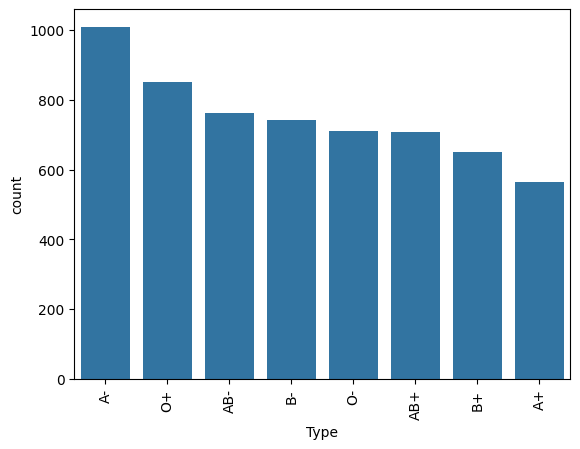

In [8]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index,y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [9]:
train,test=train_test_split(data,test_size=0.25,random_state=42)

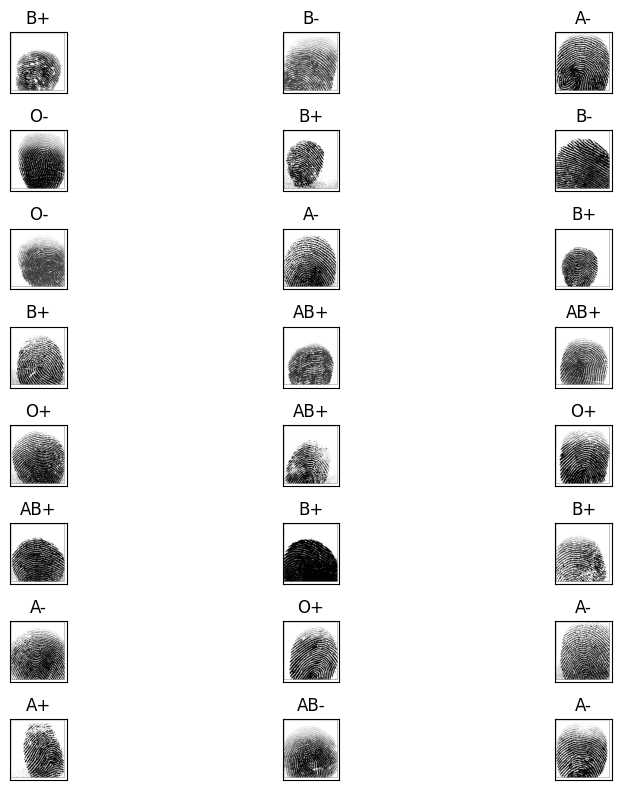

In [10]:
fig,axes = plt.subplots(nrows=8,ncols=3,figsize=(10,8),subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [11]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [12]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=[256,256],
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen=train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 4500 validated image filenames belonging to 8 classes.
Found 1500 validated image filenames belonging to 8 classes.
Found 1500 validated image filenames belonging to 8 classes.


In [13]:
pretrained_model=ResNet50(
    input_shape=(256,256,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable=False

In [14]:
inputs = pretrained_model.input

x=Dense(128, activation='relu')(pretrained_model.output)
x=Dense(128, activation='relu')(x)

outputs=Dense(8, activation='softmax')(x)

model= Model(inputs=inputs, outputs=outputs)

In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                             min_delta=0,
                             patience=2,
                             mode='auto')]

In [17]:
history=model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=3
)

Epoch 1/3
141/141 [==============================] - 542s 4s/step - loss: 1.2486 - accuracy: 0.5111 - val_loss: 0.9911 - val_accuracy: 0.6007
Epoch 2/3
141/141 [==============================] - 555s 4s/step - loss: 0.8142 - accuracy: 0.6791 - val_loss: 0.8213 - val_accuracy: 0.6740
Epoch 3/3
141/141 [==============================] - 522s 4s/step - loss: 0.6604 - accuracy: 0.7407 - val_loss: 0.6941 - val_accuracy: 0.7380


In [18]:
model.save("model_blood_group_detection.h5")

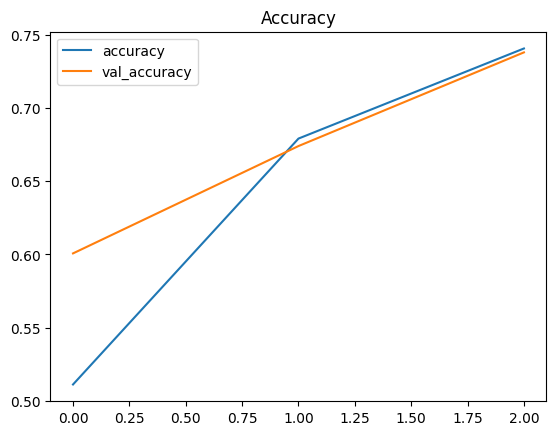

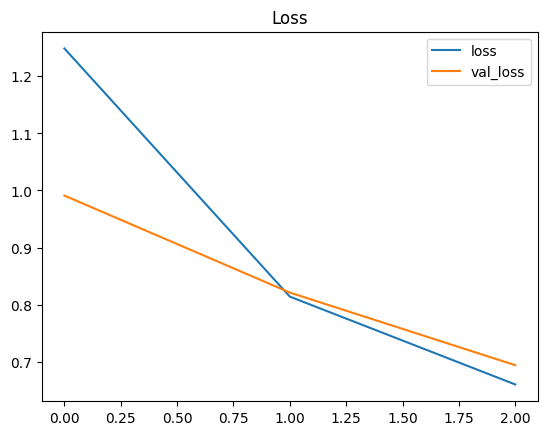

In [19]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [20]:
results = model.evaluate(test_gen,verbose=0)

print(" Test Loss: {:.5f}".format(results[0]))
print(" Test Accuracy: {:.2f}%".format(results[1]*100))

 Test Loss: 0.69409
 Test Accuracy: 73.80%


In [21]:
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

47/47 [==============================] - 111s 2s/step


In [22]:
y_test = list(test.Label)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          A+       0.91      0.80      0.85       138
          A-       0.72      0.84      0.77       258
         AB+       0.67      0.86      0.75       195
         AB-       0.90      0.43      0.59       189
          B+       0.63      0.82      0.71       160
          B-       0.95      0.75      0.84       186
          O+       0.88      0.59      0.71       213
          O-       0.56      0.82      0.67       161

    accuracy                           0.74      1500
   macro avg       0.78      0.74      0.74      1500
weighted avg       0.78      0.74      0.74      1500



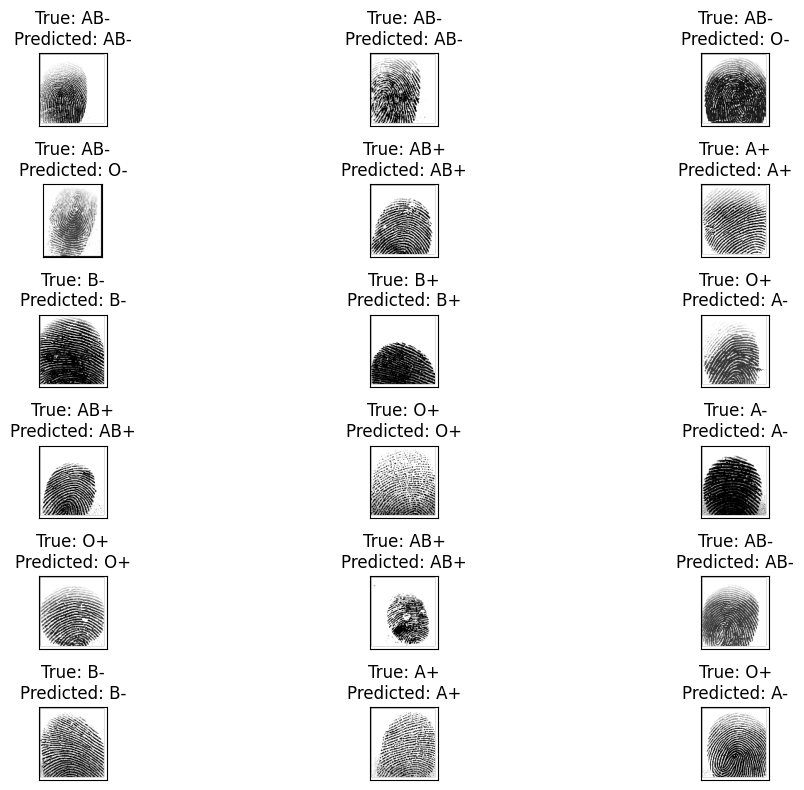

In [23]:
fig,axes = plt.subplots(nrows=6, ncols=3,figsize=(12,8),
                       subplot_kw={'xticks':[],'yticks':[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path='/home/karuppasamy/Downloads/archive (1)/dataset_blood_group/A+/cluster_0_502.BMP'

img= image.load_img(img_path, target_size=(256, 256))
x=image.img_to_array(img)

x=np.expand_dims(x,axis=0)
x=preprocess_input(x)
result=model.predict(x)
value=(result*100).astype('int')
predicted_index = np.argmax(value)
predicted_blood_group = name_class[predicted_index]
print(value)
print(predicted_blood_group)

1/1 [==============================] - 1s 729ms/step
[[ 3  0 93  0  2  0  0  0]]
O-
